In [1]:
import zarr
import sys
import allel
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.gridspec import GridSpec
from scipy import stats
from allel import stats
#import matplotlib_venn as venn
import seaborn as sns

#### genotypes

In [2]:
callset = zarr.open_group('/Users/bs13/Git/malariagen/vobs-sea-pilot-paper/data/new_uniref_merged.zarr', mode='r')
callset

<zarr.hierarchy.Group '/' read-only>

In [3]:
gt = allel.GenotypeArray(callset['calldata/GT'][:])

In [4]:
gt

<GenotypeArray shape=(266548, 136, 2) dtype=int8>
0/0 0/0 0/0 0/0 0/0 ... ./. ./. ./. ./. ./.
0/0 0/0 0/0 0/0 0/0 ... ./. ./. ./. ./. ./.
0/0 0/0 0/0 0/0 0/0 ... ./. ./. ./. ./. ./.
...
./. ./. ./. ./. ./. ... ./. ./. ./. ./. ./.
./. ./. ./. ./. ./. ... ./. ./. ./. ./. ./.
./. ./. ./. ./. ./. ... ./. ./. ./. ./. ./.

In [5]:
chrom = callset['variants/CHROM']
chrom[:]

array(['chr2L.1', 'chr2L.1', 'chr2L.1', ..., 'Pf_M76611', 'Pf_M76611',
       'Pf_M76611'], dtype=object)

#### meta data

In [6]:
#metadata file for samples with updated species groupings
df_meta = pd.read_csv('/Users/bs13/Git/malariagen/vobs-sea-pilot-paper/meta/1175-VO-KH-STLAURENT-S01-samples_updatedgr.csv', sep=',')
df_meta.columns, len(df_meta)

(Index(['ROMA_ID', 'Sanger_ID', 'Public_name', 'Sample_type', 'Status',
        'External_ID', 'Species_complex', 'Species', 'Collection_date',
        'Collection_time', 'Collection_location', 'GPS', 'Collection_context',
        'Collection_method', 'Sex', 'Specimen_type'],
       dtype='object'), 159)

In [7]:
#new samples to the meta data - we only need some columms
new_meta = pd.DataFrame()
new_meta['ROMA_ID'] = list(np.concatenate([callset['samples'][:10], list(callset['samples'][-5:])]))
new_meta['Status'] = 'sequenced'
new_meta['Species'] = ['An. arabiensis' for _ in range(5)] + ['An. gambiae' for _ in range(5)] + ['An. funestus' for _ in range(5)]
new_meta['Species_complex'] = ['Gambiae complex' for _ in range(5)] + ['Gambiae complex' for _ in range(5)] + ['Funestus group' for _ in range(5)]
new_meta['Sample_type'] = 'Genomic DNA'


In [8]:
df_meta = df_meta.append(new_meta, ignore_index=True)

/Users/bs13/Git/malariagen/vobs-sea-pilot-paper/binder/deps/conda/envs/vobs-sea-pilot-paper/lib/python3.6/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [9]:
df_meta

,Collection_context,Collection_date,Collection_location,Collection_method,Collection_time,External_ID,GPS,Public_name,ROMA_ID,Sample_type,Sanger_ID,Sex,Species,Species_complex,Specimen_type,Status
0,outdoor,24-Jul-13,Sayas,cow-baited tent,23.0,1175-S01-0001,13.5476389 / 107.024555,4248STDY6436122,VBS00001,Genomic DNA,4248STDY6436122,Female,An. annularis,Annularis group,Wild caught adult,sequenced
1,outdoor,24-Jul-13,Sayas,cow-baited tent,24.0,1175-S01-0002,13.5476389 / 107.024555,4248STDY6436123,VBS00002,Genomic DNA,4248STDY6436123,Female,An. annularis,Annularis group,Wild caught adult,sequenced
2,outdoor,23-Jul-13,Sayas,cow-baited tent,20.0,1175-S01-0003,13.5476389 / 107.024555,4248STDY6436124,VBS00003,Genomic DNA,4248STDY6436124,Female,An. annularis,Annularis group,Wild caught adult,sequenced
3,outdoor,22-Jul-13,Sayas,cow-baited tent,3.0,1175-S01-0004,13.5476389 / 107.024555,4248STDY6436125,VBS00004,Genomic DNA,4248STDY6436125,Female,An. annularis,Annularis group,Wild caught adult,sequenced
4,outdoor,21-Jul-13,Sayas,cow-baited tent,20.0,1175-S01-0005,13.5476389 / 107.024555,4248STDY6436126,VBS00005,Genomic DNA,4248STDY6436126,Female,An. annularis,Annularis group,Wild caught adult,sequenced
5,outdoor,17-Aug-13,Angkrong,cow-baited tent,19.0,1175-S01-0006,12.3129167 / 103.570388,4248STDY6436127,VBS00006,Genomic DNA,4248STDY6436127,Female,An. nivipes,Annularis group,Wild caught adult,sequenced
6,outdoor,16-Aug-13,Angkrong,cow-baited tent,1.0,1175-S01-0007,12.3129167 / 103.570388,4248STDY6634661,VBS00007,WGA,4248STDY6634661,Female,An. nivipes,Annularis group,Wild caught adult,Not sequenced
7,outdoor,14-Aug-13,Angkrong,cow-baited tent,1.0,1175-S01-0008,12.3129167 / 103.570388,4248STDY6436128,VBS00008,Genomic DNA,4248STDY6436128,Female,An. nivipes,Annularis group,Wild caught adult,sequenced
8,outdoor,17-Aug-13,Angkrong,cow-baited tent,20.0,1175-S01-0009,12.3129167 / 103.570388,4248STDY6436129,VBS00009,Genomic DNA,4248STDY6436129,Female,An. nivipes,Annularis group,Wild caught adult,sequenced
9,outdoor,17-Aug-13,Angkrong,cow-baited tent,21.0,1175-S01-0010,12.3129167 / 103.570388,4248STDY6436130,VBS00010,Genomic DNA,4248STDY6436130,Female,An. nivipes,Annularis group,Wild caught adult,sequenced


In [10]:
#keep only sequenced
df_meta_seq = df_meta[df_meta.Status == 'sequenced']
len(df_meta_seq)

143

In [11]:
#sort the meta data so in the same order as the genotypes
df_meta_seq = df_meta_seq.sort_values('ROMA_ID')

In [12]:
df_meta_seq.head()

,Collection_context,Collection_date,Collection_location,Collection_method,Collection_time,External_ID,GPS,Public_name,ROMA_ID,Sample_type,Sanger_ID,Sex,Species,Species_complex,Specimen_type,Status
159,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AC0007-C,Genomic DNA,NaN,NaN,An. arabiensis,Gambiae complex,NaN,sequenced
160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AC0017-C,Genomic DNA,NaN,NaN,An. arabiensis,Gambiae complex,NaN,sequenced
161,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AC0030-C,Genomic DNA,NaN,NaN,An. arabiensis,Gambiae complex,NaN,sequenced
162,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AC0049-C,Genomic DNA,NaN,NaN,An. arabiensis,Gambiae complex,NaN,sequenced
163,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AC0075-C,Genomic DNA,NaN,NaN,An. arabiensis,Gambiae complex,NaN,sequenced


In [13]:
df_meta_seq.shape

(143, 16)

In [14]:
all_128_samples = np.asarray(df_meta_seq.ROMA_ID)

In [15]:
all_128_samples

array(['AC0007-C', 'AC0017-C', 'AC0030-C', 'AC0049-C', 'AC0075-C',
       'AC0092-C', 'AC0115-C', 'AC0140-C', 'AC0174-C', 'AC0199-C',
       'VBS00001', 'VBS00002', 'VBS00003', 'VBS00004', 'VBS00005',
       'VBS00006', 'VBS00008', 'VBS00009', 'VBS00010', 'VBS00011',
       'VBS00012', 'VBS00013', 'VBS00014', 'VBS00015', 'VBS00017',
       'VBS00018', 'VBS00019', 'VBS00020', 'VBS00021', 'VBS00022',
       'VBS00023', 'VBS00024', 'VBS00025', 'VBS00026', 'VBS00029',
       'VBS00030', 'VBS00031', 'VBS00032', 'VBS00033', 'VBS00034',
       'VBS00035', 'VBS00036', 'VBS00037', 'VBS00038', 'VBS00039',
       'VBS00040', 'VBS00041', 'VBS00042', 'VBS00043', 'VBS00044',
       'VBS00045', 'VBS00046', 'VBS00047', 'VBS00048', 'VBS00049',
       'VBS00050', 'VBS00051', 'VBS00052', 'VBS00053', 'VBS00055',
       'VBS00059', 'VBS00061', 'VBS00063', 'VBS00064', 'VBS00065',
       'VBS00066', 'VBS00068', 'VBS00069', 'VBS00071', 'VBS00072',
       'VBS00074', 'VBS00075', 'VBS00076', 'VBS00078', 'VBS000

#### remove pf gene

In [16]:
gt.shape

(266548, 136, 2)

In [17]:
pfbool = chrom[:]!='Pf_M76611'
gt_nopf = gt.compress(pfbool)
gt_nopf.shape

(260581, 136, 2)

#### missingness

In [18]:
#first 10 and last 5 are the new samples, we want to keep these.
callset['samples'][:]

array(['AC0007-C', 'AC0017-C', 'AC0030-C', 'AC0049-C', 'AC0075-C',
       'AC0092-C', 'AC0115-C', 'AC0140-C', 'AC0174-C', 'AC0199-C',
       'VBS00001', 'VBS00002', 'VBS00003', 'VBS00004', 'VBS00006',
       'VBS00008', 'VBS00009', 'VBS00010', 'VBS00011', 'VBS00012',
       'VBS00013', 'VBS00014', 'VBS00015', 'VBS00017', 'VBS00019',
       'VBS00020', 'VBS00021', 'VBS00022', 'VBS00023', 'VBS00024',
       'VBS00025', 'VBS00026', 'VBS00029', 'VBS00030', 'VBS00031',
       'VBS00032', 'VBS00033', 'VBS00034', 'VBS00035', 'VBS00036',
       'VBS00037', 'VBS00038', 'VBS00039', 'VBS00040', 'VBS00041',
       'VBS00042', 'VBS00043', 'VBS00044', 'VBS00045', 'VBS00046',
       'VBS00047', 'VBS00048', 'VBS00049', 'VBS00050', 'VBS00051',
       'VBS00052', 'VBS00053', 'VBS00055', 'VBS00059', 'VBS00061',
       'VBS00063', 'VBS00064', 'VBS00065', 'VBS00066', 'VBS00068',
       'VBS00069', 'VBS00071', 'VBS00072', 'VBS00074', 'VBS00075',
       'VBS00076', 'VBS00078', 'VBS00079', 'VBS00081', 'VBS000

In [19]:
ismiss = gt_nopf.is_missing()
persam_ismiss = np.sum(ismiss, axis=0)
persam_ismiss.shape

(136,)

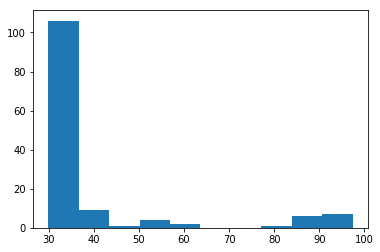

In [20]:
#plot
persam_rate = persam_ismiss/260581*100
plt.hist(persam_rate);

In [21]:
#eyeballing plot - keep samples with <40% missingness - loose 25 samples
persam_bool = persam_rate <= 40
np.count_nonzero(persam_bool)

111

In [22]:
#keep track of the samples we have left
gud_samples = np.asarray(callset['samples']).compress(persam_bool)
len(gud_samples)

111

In [23]:
#looks fine, we keep the new outgroups
gud_samples

array(['AC0007-C', 'AC0017-C', 'AC0030-C', 'AC0049-C', 'AC0075-C',
       'AC0092-C', 'AC0115-C', 'AC0140-C', 'AC0174-C', 'AC0199-C',
       'VBS00001', 'VBS00002', 'VBS00003', 'VBS00004', 'VBS00008',
       'VBS00009', 'VBS00010', 'VBS00011', 'VBS00012', 'VBS00013',
       'VBS00014', 'VBS00015', 'VBS00017', 'VBS00020', 'VBS00021',
       'VBS00022', 'VBS00023', 'VBS00024', 'VBS00025', 'VBS00026',
       'VBS00029', 'VBS00030', 'VBS00031', 'VBS00032', 'VBS00033',
       'VBS00034', 'VBS00035', 'VBS00036', 'VBS00037', 'VBS00038',
       'VBS00040', 'VBS00041', 'VBS00043', 'VBS00044', 'VBS00045',
       'VBS00046', 'VBS00047', 'VBS00048', 'VBS00049', 'VBS00050',
       'VBS00052', 'VBS00059', 'VBS00066', 'VBS00068', 'VBS00069',
       'VBS00071', 'VBS00072', 'VBS00074', 'VBS00075', 'VBS00076',
       'VBS00078', 'VBS00079', 'VBS00082', 'VBS00083', 'VBS00085',
       'VBS00086', 'VBS00087', 'VBS00088', 'VBS00090', 'VBS00091',
       'VBS00094', 'VBS00096', 'VBS00097', 'VBS00098', 'VBS000

In [24]:
#compress genotype array to keep just gud samples
gt_gudsam = gt_nopf.compress(persam_bool, axis=1)
gt_gudsam.shape

(260581, 111, 2)

In [25]:
#compress meta data to just keep the info for the gud samples
gudsam_bool = np.in1d(all_128_samples, gud_samples)
df_meta_gud = df_meta_seq[gudsam_bool]
df_meta_gud.shape

(111, 16)

In [26]:
#3. look at per var missingness
ismissvar = gt_gudsam.is_missing()
pervar_ismiss = np.sum(ismissvar, axis=1)
pervar_ismiss.shape

(260581,)

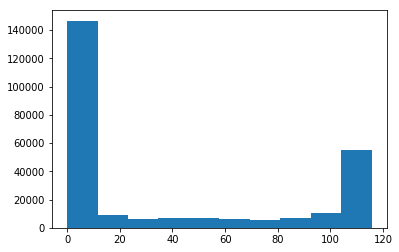

In [27]:
pervar_rate = pervar_ismiss/96*100
plt.hist(pervar_rate);

In [28]:
#how many var do we have with 0 missingness?
full = pervar_rate == 0
np.count_nonzero(full)

96440

#### with no missingness

In [29]:
#if we just use the 0 missingness sites what happens?
gt_nomiss = gt_gudsam.compress(full)
gt_nomiss

<GenotypeArray shape=(96440, 111, 2) dtype=int8>
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/0
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/0
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/0
...
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/0
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/0
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/0

In [30]:
from collections import OrderedDict

In [31]:
#plotting colors and labels for species group

sp_gr_color = OrderedDict({
    'Annularis group': '#860097',
    'Barbirostris group': '#3800a3',
    'Leucosphyrus group': '#0038dd',
    'Funestus group': '#0092dd',
    'Hyrcanus group': '#009a00',
    'Maculatus group': '#00c700',
    'An. karwari (Neocellia series)': '#b0ff00',
    'Kochi group': 'yellow',
    'Jamesii group': '#fcd200',
    'Subpictus group': '#ff8100',
    'Ludlowae group': '#d00000',
    'Tessellatus group': 'darkred',
    'Gambiae complex':'darkslategrey'
})

In [32]:
sp_gr_labels = OrderedDict({
    'Annularis group': 'Annularis group',
    'Barbirostris group': 'Barbirostris group',
    'Leucosphyrus group': 'Leucosphyrus group',
    'Funestus group': 'Funestus group',
    'Hyrcanus group': 'Hyrcanus group',
    'Maculatus group': 'Maculatus group',
    'An. karwari (Neocellia series)': 'An. karwari',
    'Kochi group': 'Kochi group',
    'Jamesii group': 'Jamesii group',
    'Subpictus group': 'Subpictus group',
    'Ludlowae group': 'Ludlowae group',
    'Tessellatus group': 'Tessellatus group',
    'Gambiae complex': 'Gambiae complex'
})

In [33]:
df_meta_gud.head()

,Collection_context,Collection_date,Collection_location,Collection_method,Collection_time,External_ID,GPS,Public_name,ROMA_ID,Sample_type,Sanger_ID,Sex,Species,Species_complex,Specimen_type,Status
159,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AC0007-C,Genomic DNA,NaN,NaN,An. arabiensis,Gambiae complex,NaN,sequenced
160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AC0017-C,Genomic DNA,NaN,NaN,An. arabiensis,Gambiae complex,NaN,sequenced
161,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AC0030-C,Genomic DNA,NaN,NaN,An. arabiensis,Gambiae complex,NaN,sequenced
162,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AC0049-C,Genomic DNA,NaN,NaN,An. arabiensis,Gambiae complex,NaN,sequenced
163,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AC0075-C,Genomic DNA,NaN,NaN,An. arabiensis,Gambiae complex,NaN,sequenced


In [34]:
#fix the df NaNs
df_meta_gud = df_meta_gud.fillna(value='')
#names so we can add labels etc
vbs = np.asarray(df_meta_gud.ROMA_ID)
vsc = np.asarray(df_meta_gud.Species_complex)
vsp = np.asarray(df_meta_gud.Species)

In [35]:
#remove the WGA samples too?
isitnotWGA = df_meta_gud.Sample_type == "Genomic DNA"
np.count_nonzero(isitnotWGA)

98

In [36]:
gt_nowga = gt_nomiss.compress((isitnotWGA), axis=1)
gt_nowga


<GenotypeArray shape=(96440, 98, 2) dtype=int8>
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/0
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/0
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/0
...
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/0
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/0
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/0

In [37]:
df_meta_nowga = df_meta_gud[isitnotWGA]
df_meta_nowga.shape

(98, 16)

In [38]:
#names so we can add labels etc
vbs = np.asarray(df_meta_nowga.ROMA_ID)
vsc = np.asarray(df_meta_nowga.Species_complex)
vsp = np.asarray(df_meta_nowga.Species)

In [39]:
#measure distance and cluster samples
d = allel.stats.pairwise_distance(gt_nowga.to_n_alt(), metric='cityblock')
z = scipy.cluster.hierarchy.linkage(d, method='average')

AttributeError: module 'allel.stats' has no attribute 'pairwise_distance'

In [40]:
#measure distance and cluster samples
d = allel.pairwise_distance(gt_nowga.to_n_alt(), metric='cityblock')
z = scipy.cluster.hierarchy.linkage(d, method='average')

In [41]:
len(vbs)

98

In [42]:
allel.plot.pairwise_distance(d);

AttributeError: module 'allel' has no attribute 'plot'

Text(1.4, -1.3, 'Sp.')

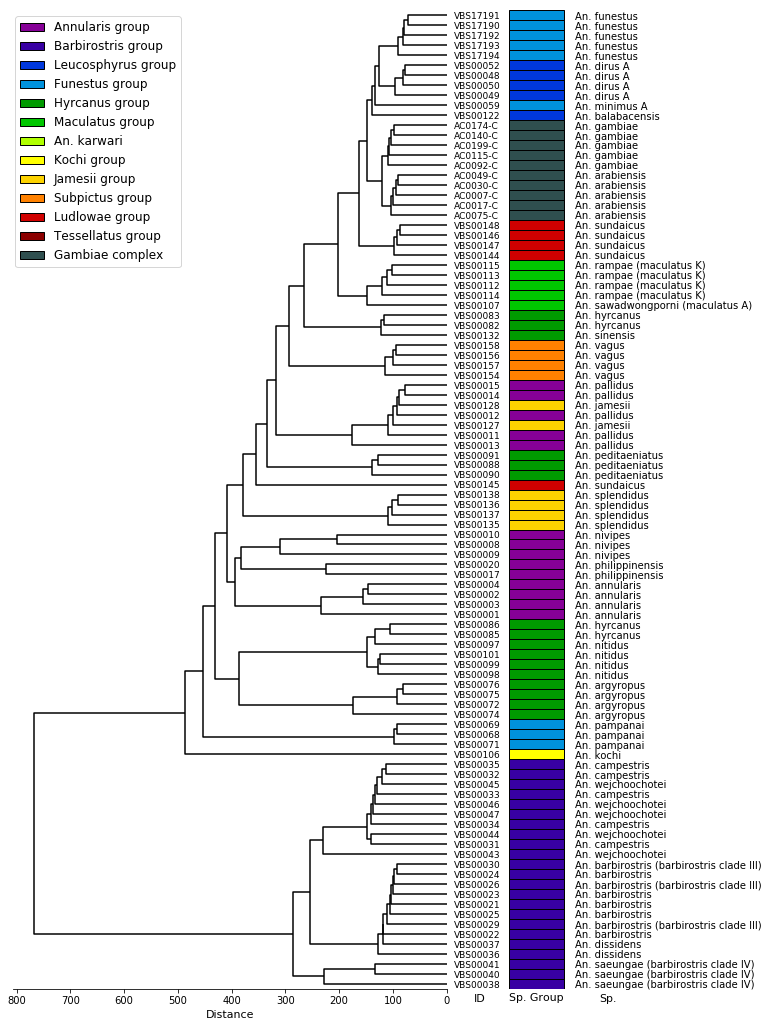

In [43]:
#plot
fig = plt.figure(figsize=(10, 18), )
gs = mpl.gridspec.GridSpec(nrows=1, ncols=2, width_ratios=(2.5, 0.4), wspace=0.22)

#dendro
ax = fig.add_subplot(gs[0, 0])
sns.despine(ax=ax, left=True, right=True, bottom=False)
r = scipy.cluster.hierarchy.dendrogram(
    z, no_labels=False, count_sort=True, 
    color_threshold=0, labels=vbs,
    above_threshold_color='k',
    ax=ax, leaf_font_size=9, orientation='left')
ax.set_xlabel('Distance', size=11)
#legend
handles = [mpl.patches.Patch(facecolor=sp_gr_color[p], label=sp_gr_labels[p], edgecolor='k') for p in sp_gr_color.keys()]
ax.legend(handles=handles, loc='upper right', bbox_to_anchor=(0.4, 1.0), ncol=1, fontsize=12)

#colour bar
ax = fig.add_subplot(gs[0, 1])
sns.despine(ax=ax, left=True, right=True, bottom=True)
#get the clustered order of samples
sp_com = vsc[r['leaves']]
#make list of species complex colours to match the clustered sample order
sp_com_colors = [sp_gr_color[p] for p in sp_com]
#plot
ax.bar(x=np.full((len(vbs)), 0.5), height=np.full((len(vbs)), 1), bottom=np.asarray(range(0,len(vbs))), color=sp_com_colors, edgecolor='k')
ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_ylim(0,len(vbs))
ax.set_xlabel('Sp. Group', size=11)
ax.set_yticks(np.arange(len(vbs))+0.5)
ax.set_yticklabels(vsp[r['leaves']], ha='left', position=(1.1,2), fontsize=10)
ax.tick_params(length=0.0)
ax.text(-0.4, -1.3, 'ID', fontsize=11)
ax.text(1.4, -1.3, 'Sp.', fontsize=11)

# fig.savefig('/Users/bs13/Dropbox/*Brandy/*Code/tree_stuff/uniref_nomissing_filtered_noWGA.jpeg', jpeg_quality=95, dpi=300, bbox_inches='tight');

In [44]:
#use different metrics

#these seem to generate the cleanest clusters, using method=average is less good
d = allel.pairwise_distance(gt_nowga.to_n_alt(), metric='cityblock')
z = scipy.cluster.hierarchy.linkage(d, method='complete')

In [45]:
len(vbs)

98

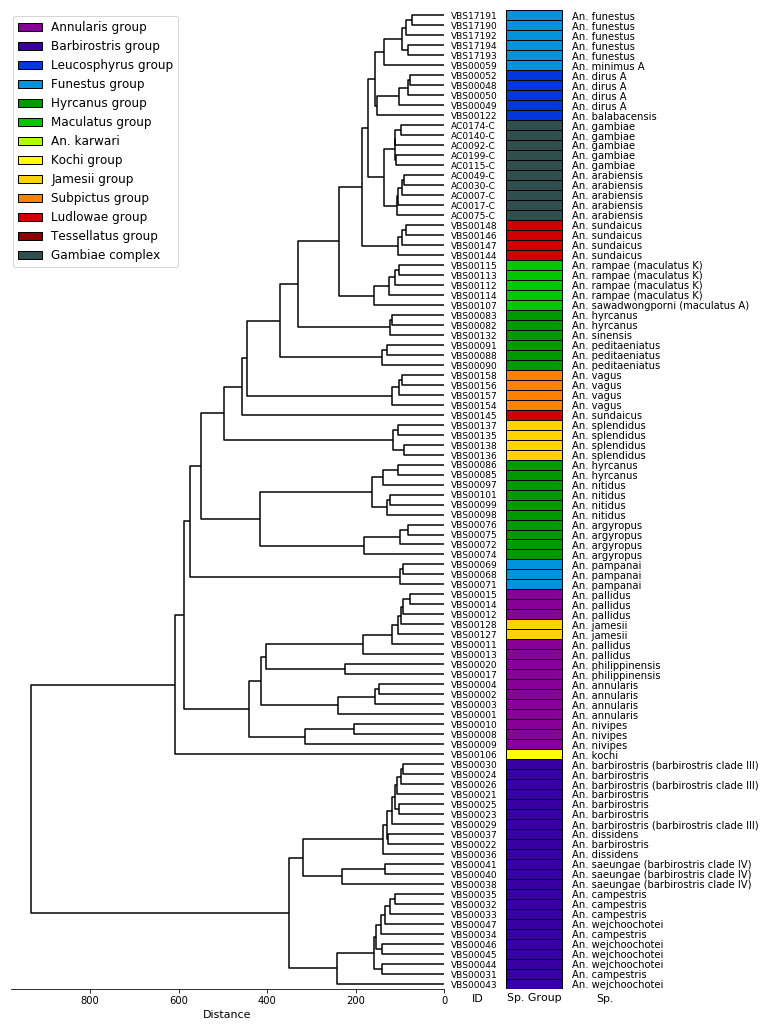

In [46]:
#plot
fig = plt.figure(figsize=(10, 18), )
gs = mpl.gridspec.GridSpec(nrows=1, ncols=2, width_ratios=(2.5, 0.4), wspace=0.22)

#dendro
ax = fig.add_subplot(gs[0, 0])
sns.despine(ax=ax, left=True, right=True, bottom=False)
r = scipy.cluster.hierarchy.dendrogram(
    z, no_labels=False, count_sort=True, 
    color_threshold=0, labels=vbs,
    above_threshold_color='k',
    ax=ax, leaf_font_size=9, orientation='left')
ax.set_xlabel('Distance', size=11)
#legend
handles = [mpl.patches.Patch(facecolor=sp_gr_color[p], label=sp_gr_labels[p], edgecolor='k') for p in sp_gr_color.keys()]
ax.legend(handles=handles, loc='upper right', bbox_to_anchor=(0.4, 1.0), ncol=1, fontsize=12)

#colour bar
ax = fig.add_subplot(gs[0, 1])
sns.despine(ax=ax, left=True, right=True, bottom=True)
#get the clustered order of samples
sp_com = vsc[r['leaves']]
#make list of species complex colours to match the clustered sample order
sp_com_colors = [sp_gr_color[p] for p in sp_com]
#plot
ax.bar(x=np.full((len(vbs)), 0.5), height=np.full((len(vbs)), 1), bottom=np.asarray(range(0,len(vbs))), color=sp_com_colors, edgecolor='k')
ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_ylim(0,len(vbs))
ax.set_xlabel('Sp. Group', size=11)
ax.set_yticks(np.arange(len(vbs))+0.5)
ax.set_yticklabels(vsp[r['leaves']], ha='left', position=(1.1,2), fontsize=10)
ax.tick_params(length=0.0)
ax.text(-0.4, -1.3, 'ID', fontsize=11)
ax.text(1.4, -1.3, 'Sp.', fontsize=11);

# fig.savefig('/Users/bs13/Dropbox/*Brandy/*Code/tree_stuff/uniref_nomissing_nocrapsamp_noWGA_othermetric.jpeg', jpeg_quality=95, dpi=300, bbox_inches='tight');


#### all variants?

In [47]:
#take the all var-gud sample genotype, remove the WGA samples then cluster
gt_gudsam

<GenotypeArray shape=(260581, 111, 2) dtype=int8>
0/0 0/0 0/0 0/0 0/0 ... ./. ./. ./. ./. ./.
0/0 0/0 0/0 0/0 0/0 ... ./. ./. ./. ./. ./.
0/0 0/0 0/0 0/0 0/0 ... ./. ./. ./. ./. ./.
...
./. ./. ./. ./. ./. ... ./. ./. ./. ./. ./.
./. ./. ./. ./. ./. ... ./. ./. ./. ./. ./.
./. ./. ./. ./. ./. ... ./. ./. ./. ./. ./.

In [48]:
gt_al = gt_gudsam.compress(isitnotWGA, axis=1)
gt_al

<GenotypeArray shape=(260581, 98, 2) dtype=int8>
0/0 0/0 0/0 0/0 0/0 ... ./. ./. ./. ./. ./.
0/0 0/0 0/0 0/0 0/0 ... ./. ./. ./. ./. ./.
0/0 0/0 0/0 0/0 0/0 ... ./. ./. ./. ./. ./.
...
./. ./. ./. ./. ./. ... ./. ./. ./. ./. ./.
./. ./. ./. ./. ./. ... ./. ./. ./. ./. ./.
./. ./. ./. ./. ./. ... ./. ./. ./. ./. ./.

In [49]:
#measure distance and cluster samples
d = allel.pairwise_distance(gt_al.to_n_alt(), metric='cityblock')
z = scipy.cluster.hierarchy.linkage(d, method='complete')

In [50]:
len(vbs)

98

Text(1.4, -1.3, 'Sp.')

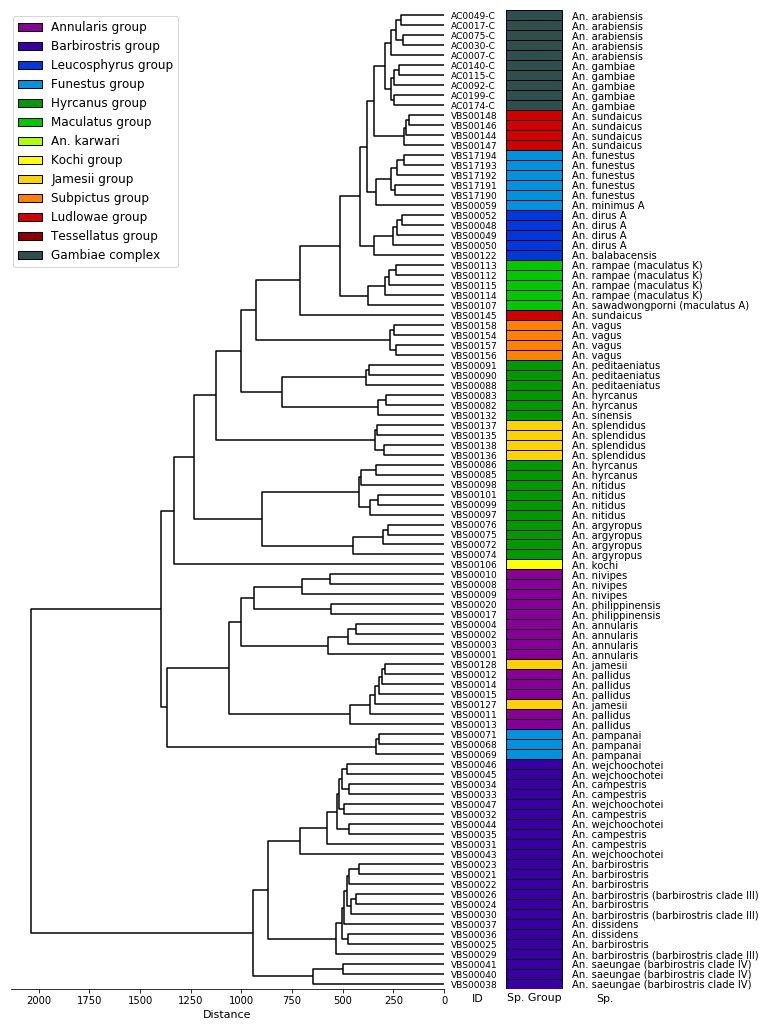

In [51]:
#plot
fig = plt.figure(figsize=(10, 18), )
gs = mpl.gridspec.GridSpec(nrows=1, ncols=2, width_ratios=(2.5, 0.4), wspace=0.22)

#dendro
ax = fig.add_subplot(gs[0, 0])
sns.despine(ax=ax, left=True, right=True, bottom=False)
r = scipy.cluster.hierarchy.dendrogram(
    z, no_labels=False, count_sort=True, 
    color_threshold=0, labels=vbs,
    above_threshold_color='k',
    ax=ax, leaf_font_size=9, orientation='left')
ax.set_xlabel('Distance', size=11)
#legend
handles = [mpl.patches.Patch(facecolor=sp_gr_color[p], label=sp_gr_labels[p], edgecolor='k') for p in sp_gr_color.keys()]
ax.legend(handles=handles, loc='upper right', bbox_to_anchor=(0.4, 1.0), ncol=1, fontsize=12)

#colour bar8
ax = fig.add_subplot(gs[0, 1])
sns.despine(ax=ax, left=True, right=True, bottom=True)
#get the clustered order of samples
sp_com = vsc[r['leaves']]
#make list of species complex colours to match the clustered sample order
sp_com_colors = [sp_gr_color[p] for p in sp_com]
#plot
ax.bar(x=np.full((len(vbs)), 0.5), height=np.full((len(vbs)), 1), bottom=np.asarray(range(0,len(vbs))), color=sp_com_colors, edgecolor='k')
ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_ylim(0,len(vbs))
ax.set_xlabel('Sp. Group', size=11)
ax.set_yticks(np.arange(len(vbs))+0.5)
ax.set_yticklabels(vsp[r['leaves']], ha='left', position=(1.1,2), fontsize=10)
ax.tick_params(length=0.0)
ax.text(-0.4, -1.3, 'ID', fontsize=11)
ax.text(1.4, -1.3, 'Sp.', fontsize=11)

# fig.savefig('/Users/bs13/Dropbox/*Brandy/*Code/tree_stuff/NEW_uniref_nomissing_nocrapsamp_noWGA_allvar.jpeg', jpeg_quality=500, dpi=300, bbox_inches='tight');
